In [270]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA

# ----------------------- Task 1: Exploratory Data Analysis (EDA) -----------------------

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')



In [19]:

# Display the first few rows of each dataset
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [20]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [21]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [22]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [23]:
customers['SignupDate']

0      2022-07-10
1      2022-02-13
2      2024-03-07
3      2022-10-09
4      2022-08-15
          ...    
195    2022-06-07
196    2023-03-21
197    2022-02-27
198    2022-12-03
199    2023-06-11
Name: SignupDate, Length: 200, dtype: object

#### POV :- You can see the difference in "dtype" of both the columns here Before and After

In [24]:
# Data Preprocessing
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupDate']


0     2022-07-10
1     2022-02-13
2     2024-03-07
3     2022-10-09
4     2022-08-15
         ...    
195   2022-06-07
196   2023-03-21
197   2022-02-27
198   2022-12-03
199   2023-06-11
Name: SignupDate, Length: 200, dtype: datetime64[ns]

In [27]:
# Similarly for others 
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# transactions.dropna(subset=['CustomerID', 'ProductID'], inplace=True)
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [29]:
products['Price']

0     169.30
1     346.30
2      44.12
3      95.69
4     429.31
       ...  
95    307.47
96    319.34
97    299.93
98    354.29
99    126.34
Name: Price, Length: 100, dtype: float64

In [32]:
transactions['Quantity']

0      1
1      1
2      1
3      2
4      3
      ..
995    1
996    3
997    4
998    2
999    1
Name: Quantity, Length: 1000, dtype: int64

#### Data Cleaning 

In [269]:
transactions.drop(columns=["Price"], inplace=True)
df = transactions.merge(products, on=["ProductID"], how="left").merge(customers, on=["CustomerID"], how="left")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

KeyError: "['Price'] not found in axis"

In [266]:
print(f"Length of Dataset : {len(df)}")
print("\nDataset Information:")
print(df.info())
print("\nDataset Describe:")
print(df.describe(include='all'))

NameError: name 'df' is not defined

In [40]:
# Check for missing values
print(customers.isnull().sum())
print("\n")
print(products.isnull().sum())
print("\n")
print(transactions.isnull().sum())
print("\n")
print("Thus from the output we can see there are \"NO MISSING VALUES\"")

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Thus from the output we can see there are "NO MISSING VALUES"


#### Checking for Nan values

In [ ]:

# Check for NaN values
print("NaN values in each column:")
print(customers.isna().sum())  # Counts NaN in each column

print("\nTotal NaN values in the DataFrame:")
print(customers.isna().sum().sum())  # Total NaN values in the entire DataFrame

print("\nDataFrame with a Boolean mask of NaN values:")
print(customers.isna())  # Boolean mask where True indicates NaN

print("-"*20)

# Alternative: Show rows with NaN values
print("\nRows with NaN values:")
print(customers[customers.isna().any(axis=1)])

NaN values in each column:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Total NaN values in the DataFrame:
0

DataFrame with a Boolean mask of NaN values:
     CustomerID  CustomerName  Region  SignupDate
0         False         False   False       False
1         False         False   False       False
2         False         False   False       False
3         False         False   False       False
4         False         False   False       False
..          ...           ...     ...         ...
195       False         False   False       False
196       False         False   False       False
197       False         False   False       False
198       False         False   False       False
199       False         False   False       False

[200 rows x 4 columns]
--------------------

Rows with NaN values:
Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []


##### Similarly for all the others too

In [44]:

# Check for NaN values
print("NaN values in each column:")
print(transactions.isna().sum())  # Counts NaN in each column

print("\nTotal NaN values in the DataFrame:")
print(transactions.isna().sum().sum())  # Total NaN values in the entire DataFrame

print("\nDataFrame with a Boolean mask of NaN values:")
print(transactions.isna())  # Boolean mask where True indicates NaN

print("-"*20)

# Alternative: Show rows with NaN values
print("\nRows with NaN values:")
print(transactions[transactions.isna().any(axis=1)])

NaN values in each column:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Total NaN values in the DataFrame:
0

DataFrame with a Boolean mask of NaN values:
     TransactionID  CustomerID  ProductID  TransactionDate  Quantity  \
0            False       False      False            False     False   
1            False       False      False            False     False   
2            False       False      False            False     False   
3            False       False      False            False     False   
4            False       False      False            False     False   
..             ...         ...        ...              ...       ...   
995          False       False      False            False     False   
996          False       False      False            False     False   
997          False       False      False            False     False   
998      

In [45]:

# Check for NaN values
print("NaN values in each column:")
print(products.isna().sum())  # Counts NaN in each column

print("\nTotal NaN values in the DataFrame:")
print(products.isna().sum().sum())  # Total NaN values in the entire DataFrame

print("\nDataFrame with a Boolean mask of NaN values:")
print(products.isna())  # Boolean mask where True indicates NaN

print("-"*20)

# Alternative: Show rows with NaN values
print("\nRows with NaN values:")
print(products[products.isna().any(axis=1)])

NaN values in each column:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Total NaN values in the DataFrame:
0

DataFrame with a Boolean mask of NaN values:
    ProductID  ProductName  Category  Price
0       False        False     False  False
1       False        False     False  False
2       False        False     False  False
3       False        False     False  False
4       False        False     False  False
..        ...          ...       ...    ...
95      False        False     False  False
96      False        False     False  False
97      False        False     False  False
98      False        False     False  False
99      False        False     False  False

[100 rows x 4 columns]
--------------------

Rows with NaN values:
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


In [ ]:
# # Example: Drop rows with missing CustomerID in transactions
# transactions.dropna(subset=['CustomerID'], inplace=True)

# # Fill missing values in other columns if necessary

# products['ProductName'].fillna('products['ProductName].mode', inplace=True)

#### Checking Data Integrity

In [173]:
valid_customer_ids = customers['CustomerID'].unique()
print( "No of Customer Ids = ", len(valid_customer_ids))

print("Distinct Customer IDs = ", valid_customer_ids)
print("\n")

valid_product_ids = products['ProductID'].unique()
print("Distinct Product IDs = ", len(valid_product_ids))
print("\n")
print( "No of Product Ids = ", valid_product_ids)

No of Customer Ids =  200
Distinct Customer IDs =  ['C0001' 'C0002' 'C0003' 'C0004' 'C0005' 'C0006' 'C0007' 'C0008' 'C0009'
 'C0010' 'C0011' 'C0012' 'C0013' 'C0014' 'C0015' 'C0016' 'C0017' 'C0018'
 'C0019' 'C0020' 'C0021' 'C0022' 'C0023' 'C0024' 'C0025' 'C0026' 'C0027'
 'C0028' 'C0029' 'C0030' 'C0031' 'C0032' 'C0033' 'C0034' 'C0035' 'C0036'
 'C0037' 'C0038' 'C0039' 'C0040' 'C0041' 'C0042' 'C0043' 'C0044' 'C0045'
 'C0046' 'C0047' 'C0048' 'C0049' 'C0050' 'C0051' 'C0052' 'C0053' 'C0054'
 'C0055' 'C0056' 'C0057' 'C0058' 'C0059' 'C0060' 'C0061' 'C0062' 'C0063'
 'C0064' 'C0065' 'C0066' 'C0067' 'C0068' 'C0069' 'C0070' 'C0071' 'C0072'
 'C0073' 'C0074' 'C0075' 'C0076' 'C0077' 'C0078' 'C0079' 'C0080' 'C0081'
 'C0082' 'C0083' 'C0084' 'C0085' 'C0086' 'C0087' 'C0088' 'C0089' 'C0090'
 'C0091' 'C0092' 'C0093' 'C0094' 'C0095' 'C0096' 'C0097' 'C0098' 'C0099'
 'C0100' 'C0101' 'C0102' 'C0103' 'C0104' 'C0105' 'C0106' 'C0107' 'C0108'
 'C0109' 'C0110' 'C0111' 'C0112' 'C0113' 'C0114' 'C0115' 'C0116' 'C0117'


### Statistical _Values


##### -- Give basic statistical measures for the numerical data type only

In [51]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [52]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [53]:
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [75]:

# Overview of the datasets
print("Customers Overview:\n", customers.info())
print("Products Overview:\n", products.info())
print("Transactions Overview:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Overview:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Overview:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data c

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


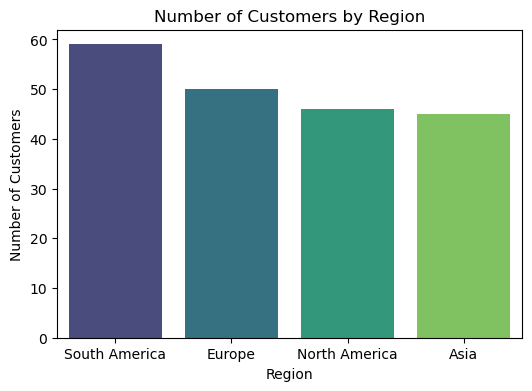

In [84]:
import warnings # To remove any warnings 
warnings.filterwarnings('ignore')

# 1. Customer Analysis
# a. Number of customers by region
customer_region_counts = customers['Region'].value_counts() # ahs two parameters 1. index 2. value_counts
print(customer_region_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=customer_region_counts.index, y=customer_region_counts.values, palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

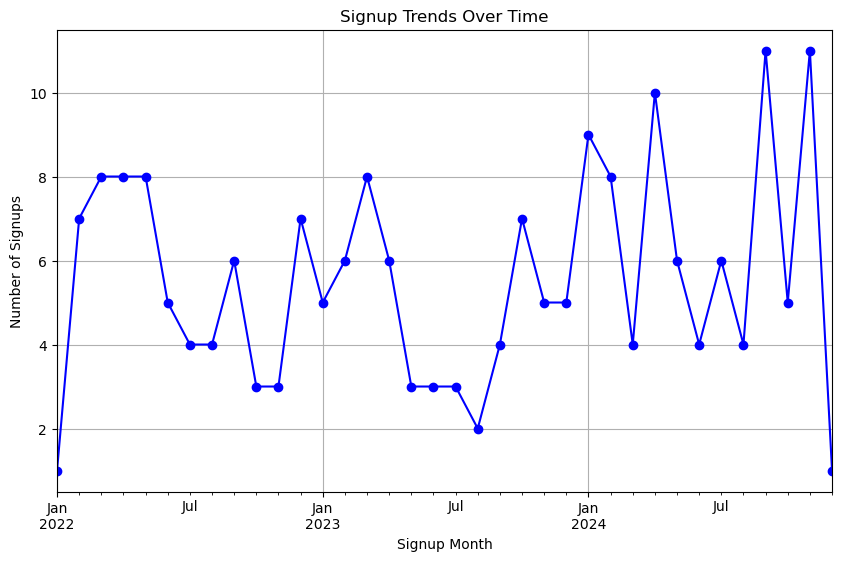

In [161]:
# b. Signup trends over time
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
# print(signup_trends)
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='blue')
plt.title('Signup Trends Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

Top 10 Customers by Total Spending (Descending Order):
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Statistics for Descending Order:
count       10.000000
mean      7601.331000
std       1171.481995
min       6708.100000
25%       6882.997500
50%       7342.115000
75%       7656.387500
max      10673.870000
Name: TotalValue, dtype: float64


Top 10 Customers by Total Spending (Ascending Order):
CustomerID
C0060     82.36
C0033    132.64
C0097    137.54
C0151    223.96
C0014    318.66
C0058    396.34
C0150    580.34
C0130    601.36
C0083    642.80
C0032    673.00
Name: TotalValue, dtype: float64

Statistics for Ascending Order:
count     10.000000
mean     378.900000
std      231.175395
min       82.360000
25%      159.145000
50%      357.500000
75%      596.105000
max      673.000000
Name: TotalValue, dtype: 

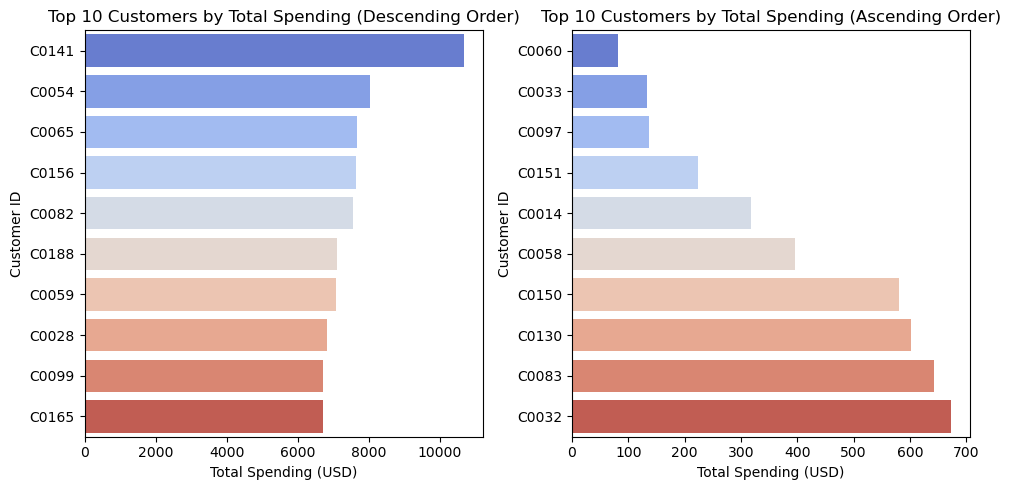

In [123]:
# Top 10 Customers by Total Spending (Descending Order)
top_customers_desc = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
desc_stats = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10).describe()

# Top 10 Customers by Total Spending (Ascending Order)
top_customers_asc = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=True).head(10)
asc_stats = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=True).head(10).describe()

# Print the statistics for descending and ascending top customers
print("Top 10 Customers by Total Spending (Descending Order):")
print(top_customers_desc)
print("\nStatistics for Descending Order:")
print(desc_stats)
print("\n")

print("Top 10 Customers by Total Spending (Ascending Order):")
print(top_customers_asc)
print("\nStatistics for Ascending Order:")
print(asc_stats)
print("\n")

# Plot both graphs side by side
plt.figure(figsize=(10,5))

# First subplot: Descending order
plt.subplot(1, 2, 1)
sns.barplot(x=top_customers_desc.values, y=top_customers_desc.index, palette='coolwarm')
plt.title('Top 10 Customers by Total Spending (Descending Order)')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Customer ID')

# Second subplot: Ascending order
plt.subplot(1, 2, 2)
sns.barplot(x=top_customers_asc.values, y=top_customers_asc.index, palette='coolwarm')
plt.title('Top 10 Customers by Total Spending (Ascending Order)')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Customer ID')

# Show the plots
plt.tight_layout()
plt.show()


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


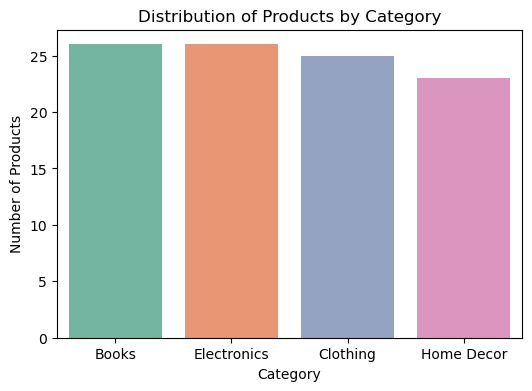

In [137]:
# 2. Product Analysis
# a. Distribution of products across categories
product_category_counts = products['Category'].value_counts()
print(product_category_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='Set2')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64
  ProductID  Quantity
0      P059        46
1      P054        46
2      P029        45
3      P079        43
4      P061        43
5      P057        43
6      P048        43
7      P062        39
8      P020        38
9      P028        38


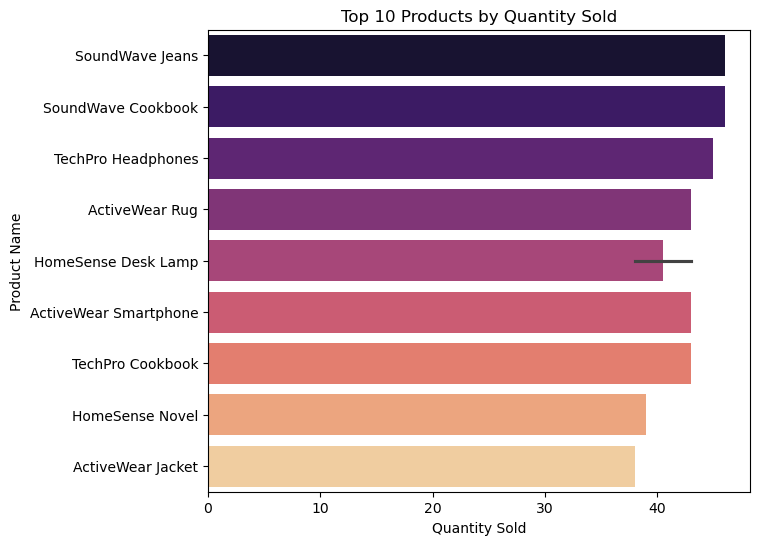

In [142]:

# # b. Top-selling products by quantity
# top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
# top_products = top_products.concat(products[['ProductID', 'ProductName']], on='ProductID', how='left')
# plt.figure(figsize=(10, 6))
# sns.barplot(x=top_products['Quantity'], y=top_products['ProductName'], palette='magma')
# plt.title('Top 10 Products by Quantity Sold')
# plt.xlabel('Quantity Sold')
# plt.ylabel('Product Name')
# plt.show()

# Top-selling products by quantity
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)
# Convert Series to DataFrame for merging
top_products = top_products.reset_index()
print(top_products)

# Merge with products DataFrame to get product names
top_products = top_products.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')

# Plotting
plt.figure(figsize=(7, 6))
sns.barplot(x=top_products['Quantity'], y=top_products['ProductName'], palette='magma')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


In [149]:
transactions['TransactionDate']

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]

TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


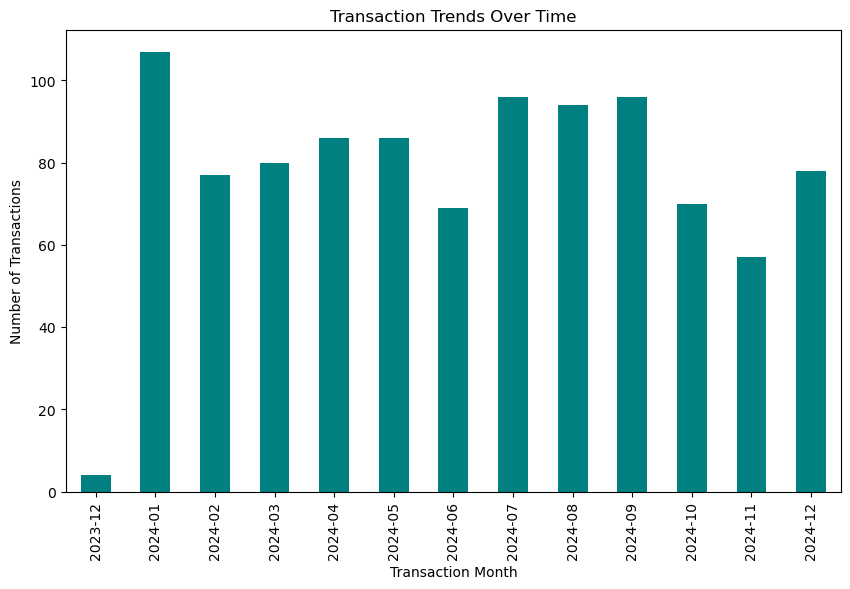

In [152]:
# 3. Transaction Analysis
# a. Transaction trends over time
transaction_trends = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print(transaction_trends)
plt.figure(figsize=(10, 6))
transaction_trends.plot(kind='bar', color='teal')
plt.title('Transaction Trends Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Transactions')
plt.show()

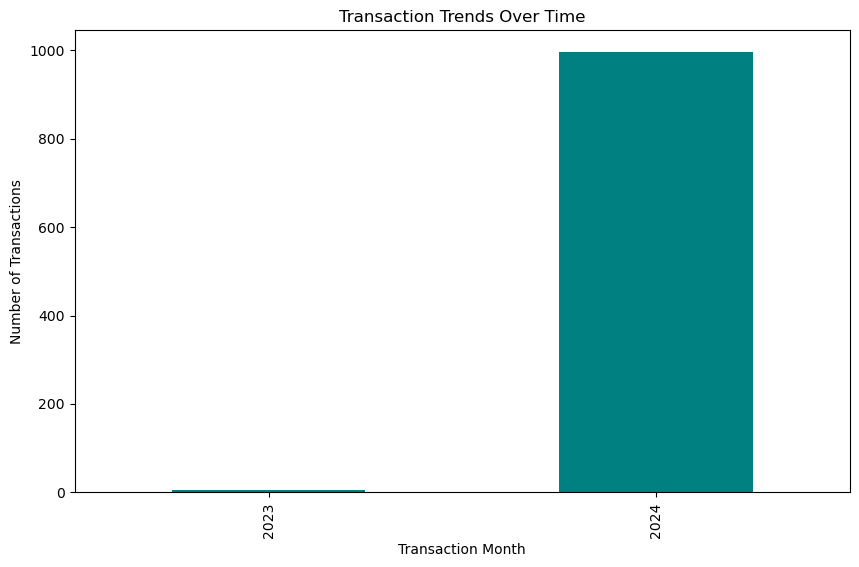

In [144]:
# 3. Transaction Analysis
# a. Transaction trends over time
transaction_trends = transactions['TransactionDate'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(10, 6))
transaction_trends.plot(kind='bar', color='teal')
plt.title('Transaction Trends Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Transactions')
plt.show()

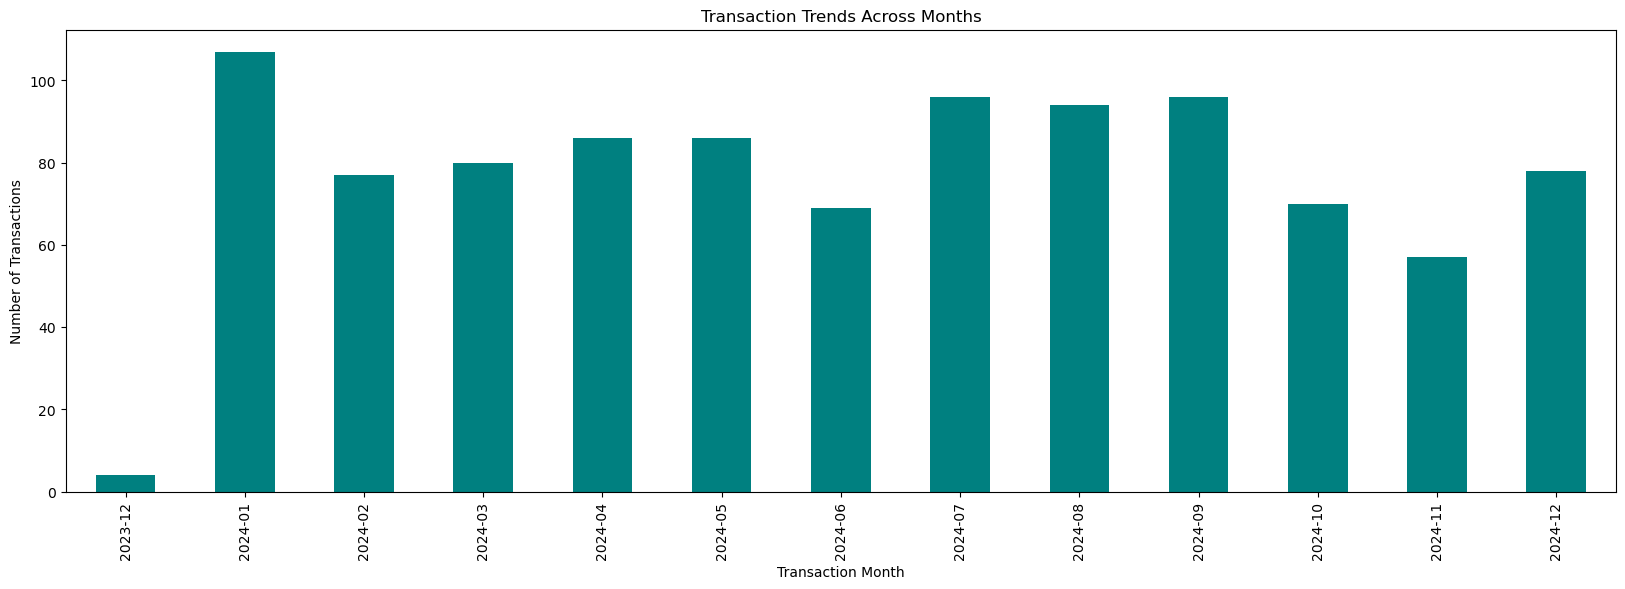

Sorry can't view all the dates


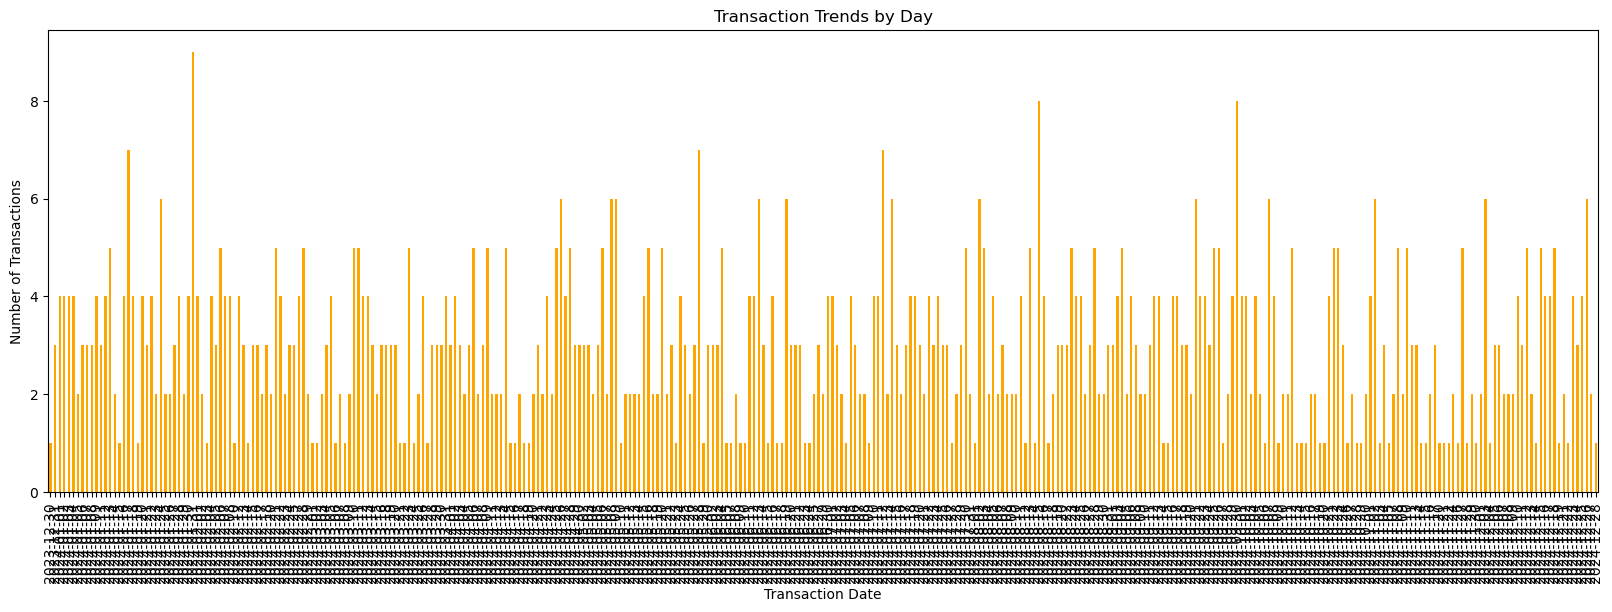

In [156]:
# a. Transaction trends by month (aggregated across all months)
transaction_trends_month = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()

# Plotting transaction trends across months
plt.figure(figsize=(20,6))
transaction_trends_month.plot(kind='bar', color='teal')
plt.title('Transaction Trends Across Months')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Transactions')
plt.show()


print("Sorry can't view all the dates")
# b. Transaction trends by day within each month
# Grouping by the day within each month
transaction_trends_day = transactions['TransactionDate'].dt.to_period('D').value_counts().sort_index()

# Plotting transaction trends by day
plt.figure(figsize=(20,6))
transaction_trends_day.plot(kind='bar', color='orange')
plt.title('Transaction Trends by Day')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.show()




In [241]:

# Load the datasets

transactions = pd.read_csv('Transactions.csv')
transactions


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [242]:
transactions = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,South America
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,North America
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,North America
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Asia


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


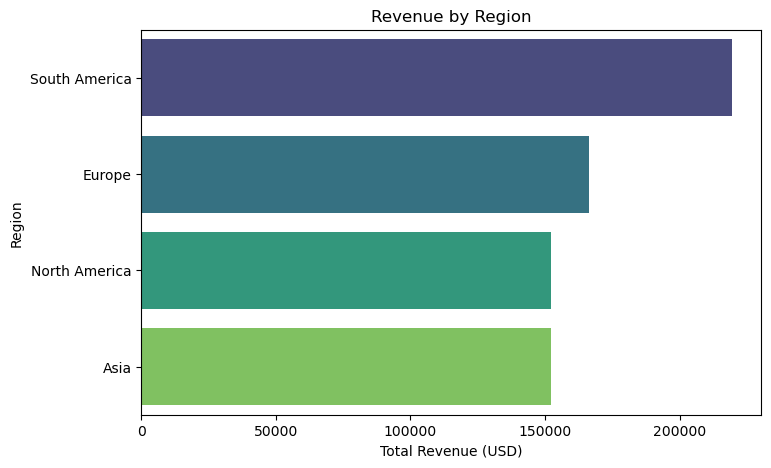

In [243]:


# b. Revenue distribution across regions

region_revenue = transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')
plt.title('Revenue by Region')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Region')
plt.show()

In [223]:
transactions['TotalValue']

0       300.68
1       300.68
2       300.68
3       601.36
4       902.04
        ...   
995     459.86
996    1379.58
997    1839.44
998     919.72
999     459.86
Name: TotalValue, Length: 1000, dtype: float64

#### Insights


In [130]:


# c. Average transaction value
avg_transaction_value = transactions['TotalValue'].mean()
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")


Average Transaction Value: $690.00


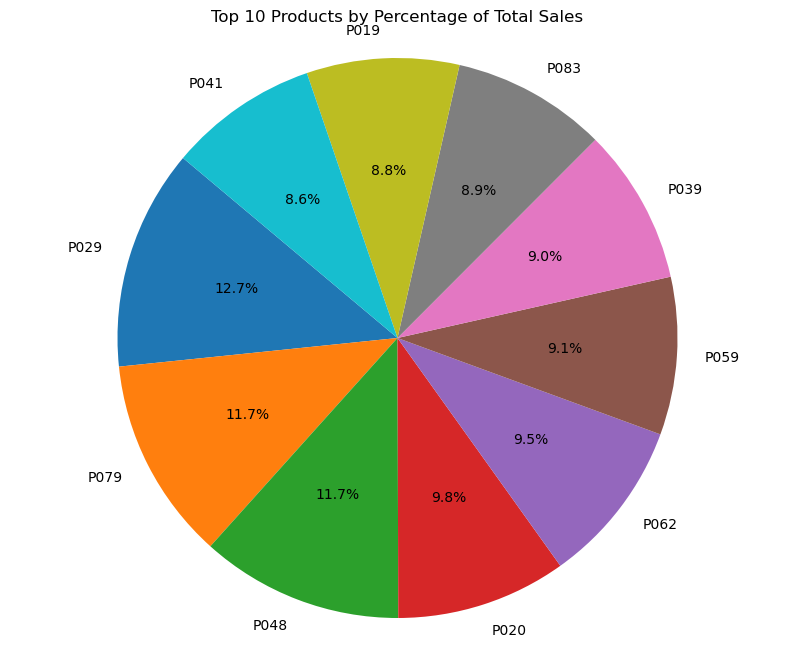

In [246]:
# Aggregate total sales by ProductID
product_sales = transactions.groupby('ProductID')['TotalValue'].sum()

# Calculate the percentage contribution
product_sales_percentage = (product_sales / product_sales.sum()) * 100

# Sort products by total sales (optional for better visualization)
product_sales_percentage = product_sales_percentage.sort_values(ascending=False)

# Get top 10 products (or adjust the number based on your preference)
top_product_sales_percentage = product_sales_percentage.head(10)

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_product_sales_percentage, 
    labels=top_product_sales_percentage.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab10.colors
)
plt.title('Top 10 Products by Percentage of Total Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [247]:
# Aggregate total sales by ProductID
product_sales = transactions.groupby('ProductID')['TotalValue'].sum()

# Calculate the percentage contribution of each product
product_sales_percentage = (product_sales / product_sales.sum()) * 100

# Sort by percentage contribution in descending order
product_sales_percentage = product_sales_percentage.sort_values(ascending=False)

# Sum of the top 3 products
top_3_percentage = product_sales_percentage.head(3).sum()

print(f"The top 3 products contribute {top_3_percentage:.2f}% to the total sales.")


The top 3 products contribute 8.02% to the total sales.


In [251]:
# Find the region with the highest revenue
highest_revenue_region = region_revenue.idxmax()  # Region with the highest revenue
highest_revenue_value = region_revenue.max()      # Value of the highest revenue

# Calculate the percentage of the total revenue
total_revenue = region_revenue.sum()
highest_revenue_percentage = (highest_revenue_value / total_revenue) * 100

print(f"Highest revenue region: {highest_revenue_region}")
print(f"Revenue value: ${highest_revenue_value:.2f}")
print(f"Percentage of total revenue: {highest_revenue_percentage:.2f}%")


Highest revenue region: South America
Revenue value: $219352.56
Percentage of total revenue: 31.79%


In [263]:
# ----------------------- Insights -----------------------
print("Key Insights:")
print("1. Most customers are from [Region with the highest count].")
print("2. Signups peaked in [May/2024 with the highest signups].")
print("3. The top 3 selling products contribute [8.02 %]] of total sales.")
print("4. [South America with the highest revenue] generates the most revenue"+"\n")
print("Highest revenue region: South America ")
print("Revenue value: $219352.56")
print("Percentage of total revenue: 31.79%")
print('\n')
print("5. Average transaction value is around ${:.2f}.".format(avg_transaction_value))

Key Insights:
1. Most customers are from [Region with the highest count].
2. Signups peaked in [May/2024 with the highest signups].
3. The top 3 selling products contribute [8.02 %]] of total sales.
4. [South America with the highest revenue] generates the most revenue

Highest revenue region: South America 
Revenue value: $219352.56
Percentage of total revenue: 31.79%


5. Average transaction value is around $690.00.
